# Figure 4

This code can be used to reproduce Figure 4.

In [1]:
import numpy as np
from tslearn.metrics import dtw, soft_dtw
import matplotlib.pyplot as plt

from dtw_gi import dtw_gi, softdtw_gi
from utils import set_fig_style, make_one_spiral, get_rot2d


def normalized_softdtw(x, y, gamma):
    return np.sqrt(soft_dtw(x, y, gamma=gamma)
                   - .5 * (soft_dtw(x, x, gamma=gamma) +
                           soft_dtw(y, y, gamma=gamma)))

# Experiment parameters
np.random.seed(0)
n_repeats = 50
n_theta = 30
perc = 20
gamma = .01

# Metrics to be tested
list_functions = [
    dtw,
    lambda x, y: normalized_softdtw(x, y, gamma=gamma),
    lambda x, y: dtw_gi(x, y, max_iter=100, use_bias=True)[-1],
    lambda x, y: np.sqrt(softdtw_gi(x, y, gamma=gamma, normalize=True,
                                    max_iter=100, early_stopping_patience=10))
]
list_names = ["DTW", "softDTW", "DTW-GI", "softDTW-GI"]

In [2]:
# Compute costs associated to each metric
costs = {name: np.zeros((n_theta, n_repeats)) for name in list_names}
for i_theta, theta in enumerate(np.linspace(0, 2 * np.pi, n_theta)):
    for i_repeat in range(n_repeats):
        ts0 = make_one_spiral(80)
        ts1 = make_one_spiral(80)
        ts1 = np.dot(ts1, get_rot2d(theta))

        for name, f in zip(list_names, list_functions):
            costs[name][i_theta, i_repeat] = f(ts0, ts1)

# Normalization
for name in list_names:
    costs[name] /= costs[name][0].mean()

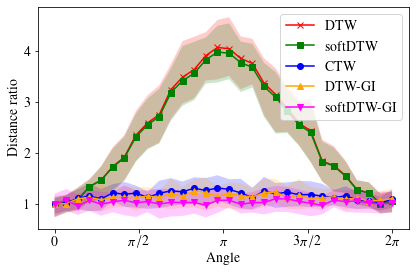

In [3]:
# Figure generation
set_fig_style(font_size=14)
colors = ["r", "g", "b", "orange", "magenta"]
markers = ["x", "s", "o", "^", "v"]
for idx, name in enumerate(list_names):
    plt.plot(np.linspace(0, 2 * np.pi, n_theta),
             np.mean(costs[name], axis=1), marker=markers[idx],
             color=colors[idx], label=name)
    plt.fill_between(np.linspace(0, 2 * np.pi, n_theta),
                     np.percentile(costs[name], perc, axis=1),
                     np.percentile(costs[name], 100 - perc, axis=1),
                     alpha=0.2, facecolor=colors[idx])

plt.xticks([0., np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi],
           ["$0$", "$\pi / 2$", "$\pi$", "$3 \pi / 2$", "$2 \pi$"])
plt.xlabel("Angle")
plt.ylabel("Distance ratio")
plt.legend()
plt.tight_layout()
plt.show()